In [ ]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.8631 - loss: 0.4674 - val_accuracy: 0.9814 - val_loss: 0.0562
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.9882 - val_loss: 0.0382
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9878 - val_loss: 0.0346
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9884 - val_loss: 0.0326
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.

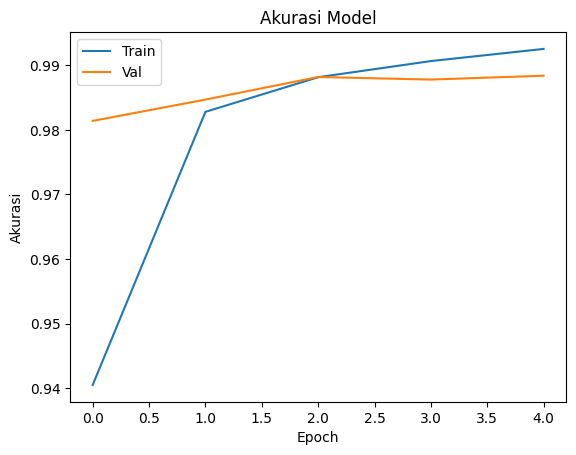

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi model
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.7246 - loss: 0.7885 - val_accuracy: 0.8468 - val_loss: 0.4381
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.8719 - loss: 0.3596 - val_accuracy: 0.8808 - val_loss: 0.3316
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.8894 - loss: 0.3097 - val_accuracy: 0.8823 - val_loss: 0.3265
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9027 - loss: 0.2694 - val_accuracy: 0.9002 - val_loss: 0.2844
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9115 - loss: 0.2425 - val_accuracy: 0.9025 - val_loss: 0.2699
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.83      0.85      1000
           3       0.88      0.92      0.90      1000
           4       0.83      0.88     

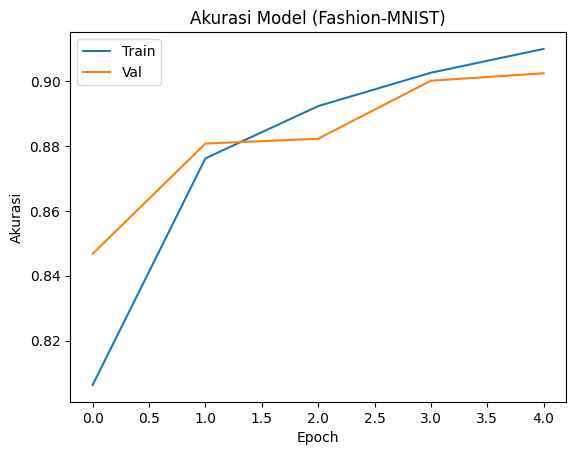

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# === Ganti dataset ke Fashion-MNIST ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model (Fashion-MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 164ms/step - accuracy: 0.3439 - loss: 1.8078 - val_accuracy: 0.5187 - val_loss: 1.3711
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 162ms/step - accuracy: 0.5597 - loss: 1.2439 - val_accuracy: 0.6053 - val_loss: 1.1432
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.6265 - loss: 1.0724 - val_accuracy: 0.6487 - val_loss: 1.0221
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.6624 - loss: 0.9767 - val_accuracy: 0.6605 - val_loss: 0.9964
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 157ms/step - accuracy: 0.6865 - loss: 0.9048 - val_accuracy: 0.6639 - val_loss: 0.9727
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.85      0.71      0.78      1000
           2       0.58      0.54      0.56      1000
           3       0.47      0.50      0.48      1000
           4       0.55      0.66    

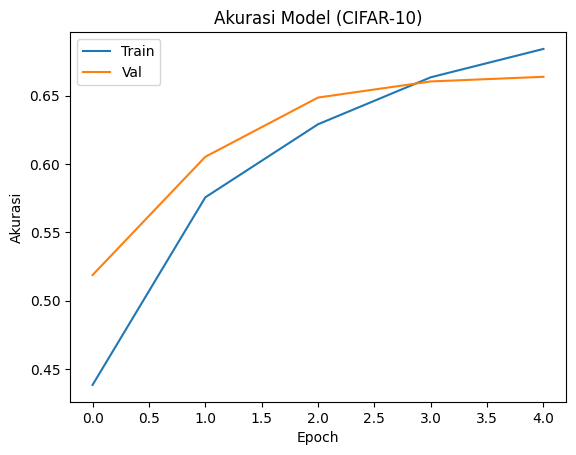

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# === Ganti dataset ke CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

DATASET: MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.8654 - loss: 0.4877 - val_accuracy: 0.9820 - val_loss: 0.0557
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.9885 - val_loss: 0.0377
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9888 - loss: 0.0375 - val_accuracy: 0.9871 - val_loss: 0.0375
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.9904 - val_loss: 0.0284
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

CLASSIFICATION REPORT for MNIST
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
          

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 90ms/step - accuracy: 0.7214 - loss: 0.7906 - val_accuracy: 0.8533 - val_loss: 0.4054
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.8695 - loss: 0.3565 - val_accuracy: 0.8760 - val_loss: 0.3463
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.8901 - loss: 0.3046 - val_accuracy: 0.8838 - val_loss: 0.3259
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.8993 - loss: 0.2768 - val_accuracy: 0.8900 - val_loss: 0.3038
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9082 - loss: 0.2480 - val_accuracy: 0.8962 - val_loss: 0.2807
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

CLASSIFICATION REPORT for Fashion-MNIST
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.80      0.84      1000
           3       0.91      0.88      0.90      1000
  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.3622 - loss: 1.7503 - val_accuracy: 0.5448 - val_loss: 1.2822
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.5624 - loss: 1.2343 - val_accuracy: 0.6027 - val_loss: 1.1291
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.6191 - loss: 1.0812 - val_accuracy: 0.6353 - val_loss: 1.0434
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.6560 - loss: 0.9840 - val_accuracy: 0.6548 - val_loss: 0.9867
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.6798 - loss: 0.9212 - val_accuracy: 0.6800 - val_loss: 0.9354
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

CLASSIFICATION REPORT for CIFAR-10
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.76      0.83      0.79      1000
           2       0.57      0.56      0.56      1000
           3       0.52      0.46      0.49      1000
 

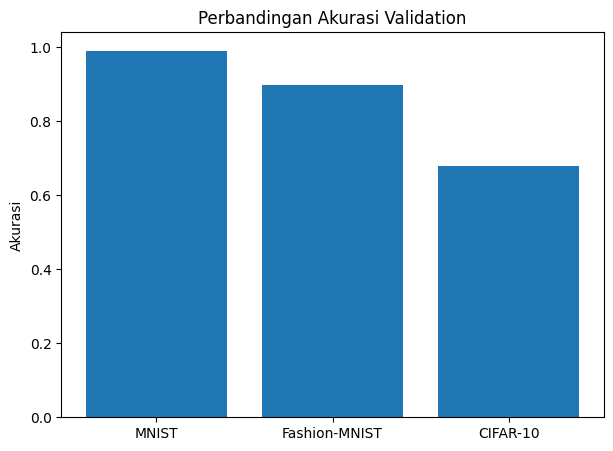

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------------------
# FUNCTION UNTUK TRAIN + EVALUATE
# -------------------------------------------
def run_experiment(name, loader, img_shape):
    print("="*80)
    print("DATASET:", name)
    print("="*80)

    # Load dataset
    (x_train, y_train), (x_test, y_test) = loader()

    # Untuk CIFAR10, label perlu flatten
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Normalisasi
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Untuk grayscale → tambahkan channel dim
    if x_train.ndim == 3:
        x_train = x_train[..., None]
        x_test = x_test[..., None]

    # Build model
    model = build_model(img_shape)

    # Train
    hist = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )

    # Predict
    y_pred = np.argmax(model.predict(x_test), axis=1)

    # Classification report
    print("\nCLASSIFICATION REPORT for", name)
    print(classification_report(y_test, y_pred))

    # Return metrics
    return {
        "Dataset": name,
        "Train Acc": hist.history['accuracy'][-1],
        "Val Acc": hist.history['val_accuracy'][-1]
    }


# =============================================================
#              JALANKAN EXPERIMENT UNTUK 3 DATASET
# =============================================================
results = []

# MNIST
results.append(run_experiment(
    "MNIST",
    tf.keras.datasets.mnist.load_data,
    (28,28,1)
))

# Fashion-MNIST
results.append(run_experiment(
    "Fashion-MNIST",
    tf.keras.datasets.fashion_mnist.load_data,
    (28,28,1)
))

# CIFAR-10
results.append(run_experiment(
    "CIFAR-10",
    tf.keras.datasets.cifar10.load_data,
    (32,32,3)
))

# =============================================================
#                 TABEL PERBANDINGAN AKURASI
# =============================================================
df = pd.DataFrame(results)
print("\n\n===== PERBANDINGAN AKURASI =====")
print(df)

# Plot perbandingan
plt.figure(figsize=(7,5))
plt.bar(df["Dataset"], df["Val Acc"])
plt.title("Perbandingan Akurasi Validation")
plt.ylabel("Akurasi")
plt.show()